In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('medical insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
print("the shape of dataset is:", df.shape)

the shape of dataset is: (1338, 7)


In [8]:
df["charges"].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [9]:
df=df.drop_duplicates()
print(f"rows and columns after dropping duplicates:",df.shape)

rows and columns after dropping duplicates: (1337, 7)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
categorical_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        categorical_col.append(x)
print(f"object data type columns are:\n",categorical_col)


numerical_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64'or df.dtypes[x]=='int64':
        numerical_col.append(x)
print(f"\nNumber datatype columns are:\n",numerical_col)        

object data type columns are:
 ['sex', 'smoker', 'region']

Number datatype columns are:
 ['age', 'bmi', 'children', 'charges']


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1337.0,NaN,NaN,NaN,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0
sex,1337,2,male,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1337.0,NaN,NaN,NaN,30.663452,6.100468,15.96,26.29,30.4,34.7,53.13
children,1337.0,NaN,NaN,NaN,1.095737,1.205571,0.0,0.0,1.0,2.0,5.0
smoker,1337,2,no,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1337,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1337.0,NaN,NaN,NaN,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [15]:
df.nunique().to_frame("unique values")

,unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [16]:
for col in categorical_col:
    print(col)
    print(df[col].value_counts())
    print("="*50)

sex
male      675
female    662
Name: sex, dtype: int64
smoker
no     1063
yes     274
Name: smoker, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


In [17]:
df['children']=df['children'].astype('O')
df['children'].dtype

dtype('O')

In [18]:
categorical_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        categorical_col.append(x)
print(f"object data type columns are:\n",categorical_col)


numerical_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64'or df.dtypes[x]=='int64':
        numerical_col.append(x)
print(f"\nNumber datatype columns are:\n",numerical_col)   

object data type columns are:
 ['sex', 'children', 'smoker', 'region']

Number datatype columns are:
 ['age', 'bmi', 'charges']


male      675
female    662
Name: sex, dtype: int64


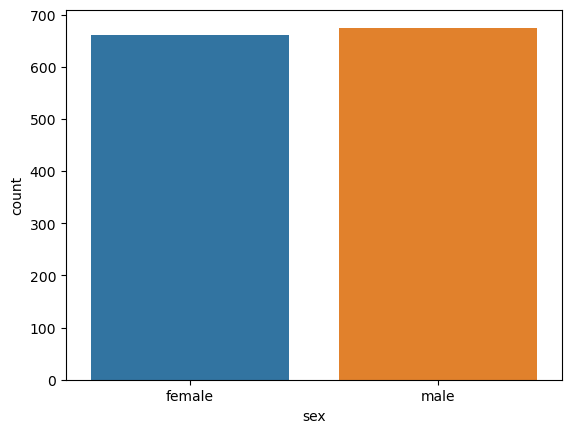

In [19]:
ax=sns.countplot(x='sex', data=df[categorical_col])
print(df['sex'].value_counts())

no     1063
yes     274
Name: smoker, dtype: int64


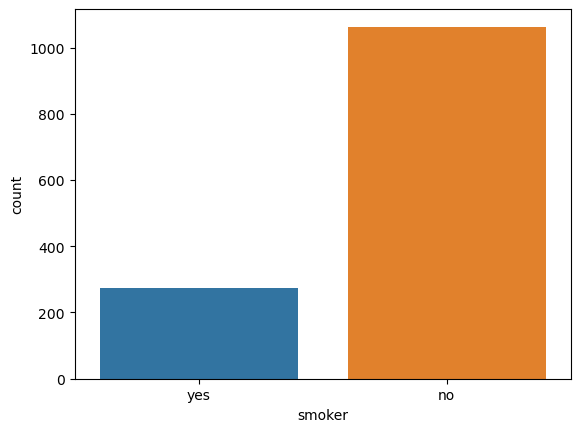

In [20]:
ax=sns.countplot(x='smoker', data=df[categorical_col])
print(df['smoker'].value_counts())

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


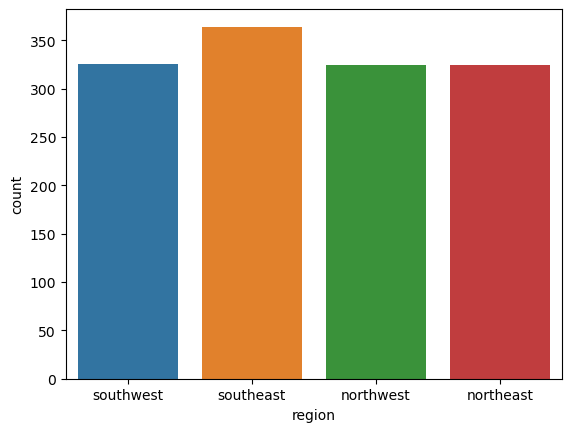

In [21]:
ax=sns.countplot(x='region', data=df[categorical_col])
print(df['region'].value_counts())

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


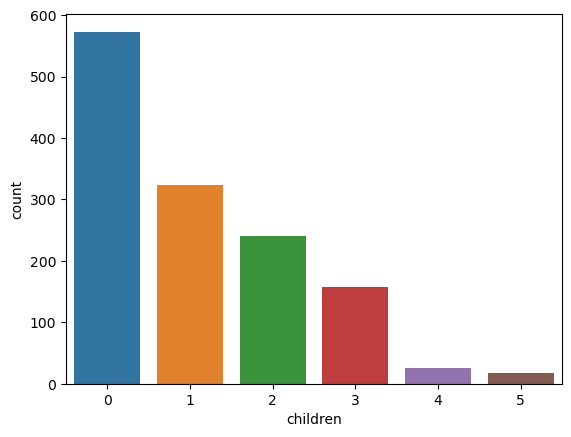

In [22]:
ax=sns.countplot(x='children', data=df[categorical_col])
print(df['children'].value_counts())

0.054780773126998195


<Axes: xlabel='age', ylabel='Density'>

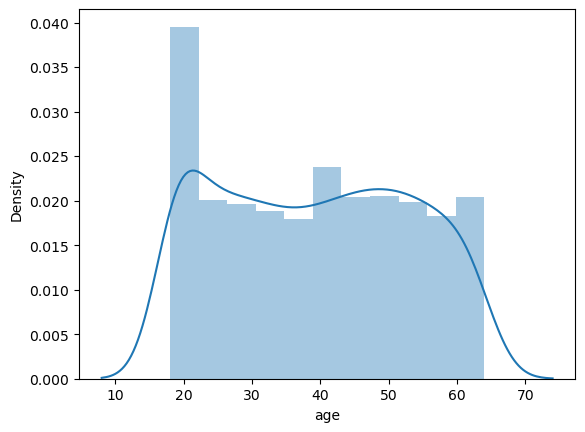

In [23]:
print(df['age'].skew())
sns.distplot(df['age'],kde=True)

0.28391419385321137


<Axes: xlabel='bmi', ylabel='Density'>

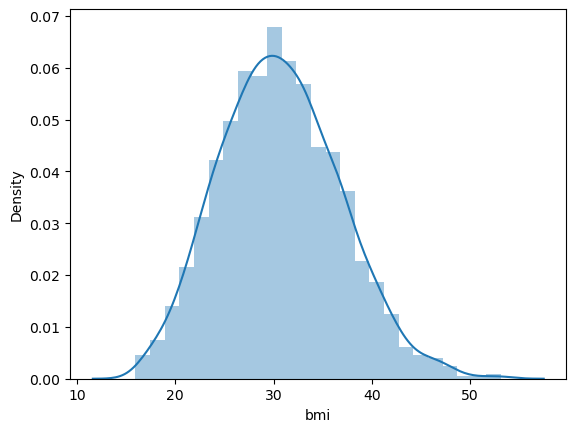

In [24]:
print(df['bmi'].skew())
sns.distplot(df['bmi'],kde=True)

1.5153909108403483


<Axes: xlabel='charges', ylabel='Density'>

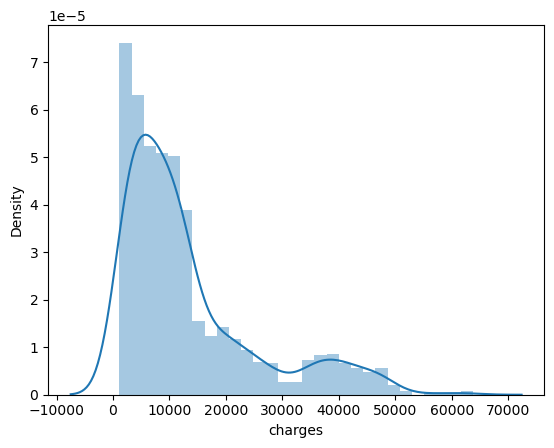

In [25]:
print(df['charges'].skew())
sns.distplot(df['charges'],kde=True)

<Axes: xlabel='age', ylabel='bmi'>

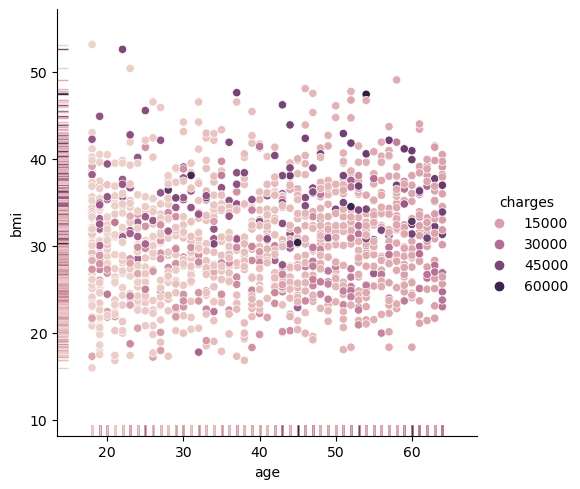

In [26]:
sns.relplot(data=df,x='age',y='bmi',hue='charges')
sns.rugplot(data=df,x='age',y='bmi',hue='charges',legend=False)

<Axes: xlabel='age', ylabel='smoker'>

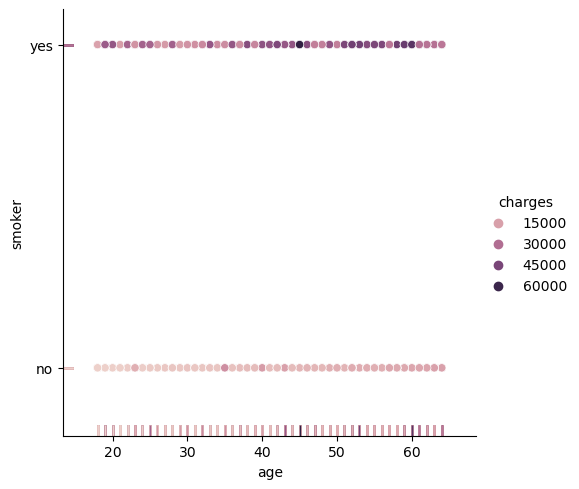

In [27]:
sns.relplot(data=df,x='age',y='smoker',hue='charges')
sns.rugplot(data=df,x='age',y='smoker',hue='charges',legend=False)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
for i in df[categorical_col]:
    df[i]=le.fit_transform(df[i])
df    

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int32  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(4), int64(1)
memory usage: 95.0 KB


In [32]:
df.isna().sum().sum()

0

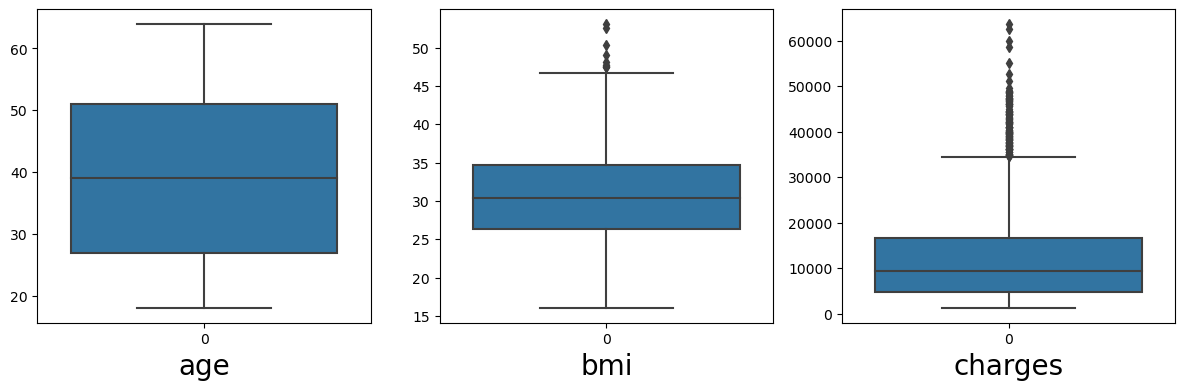

In [33]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in df[numerical_col]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number +=1
    
plt.tight_layout()    
    

In [34]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

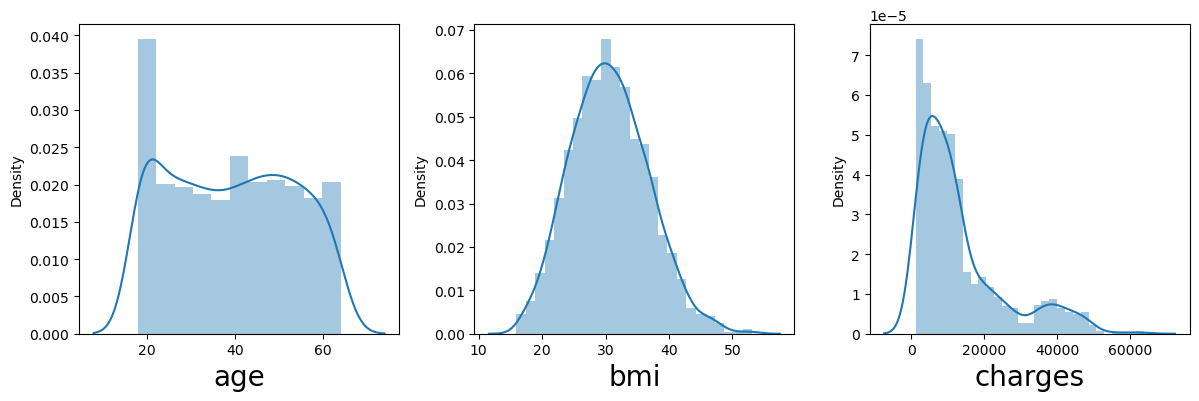

In [35]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in df[numerical_col]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number +=1
    
plt.tight_layout()

In [36]:
for col in numerical_col:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [37]:
df[numerical_col].skew()

age        0.054781
bmi        0.283914
charges   -0.089558
dtype: float64

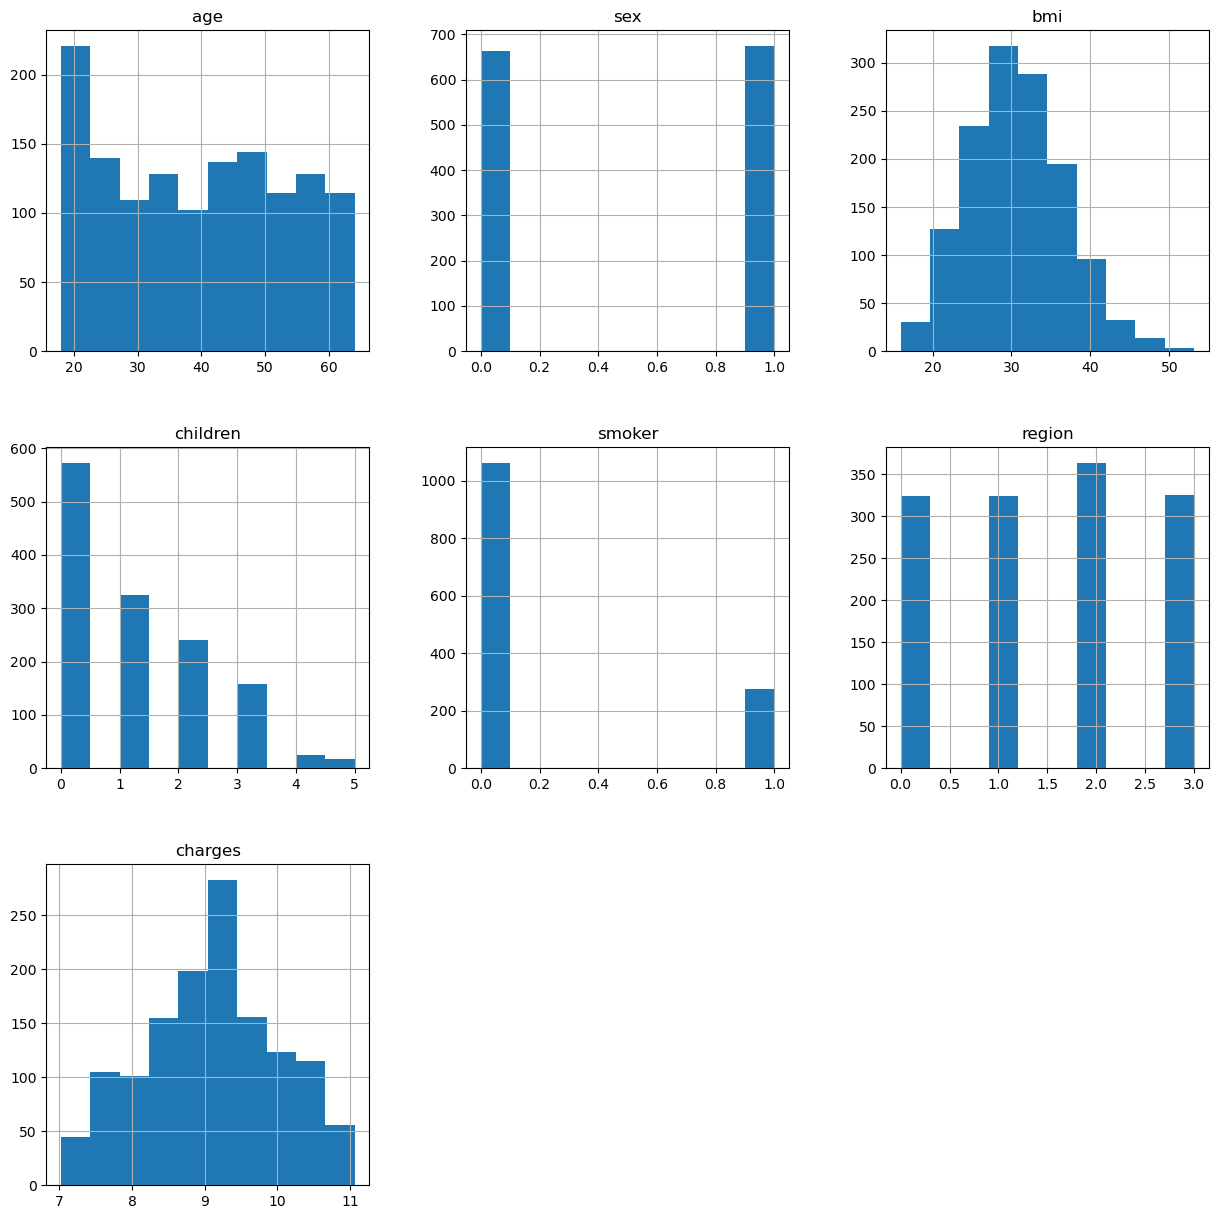

In [38]:
df.hist(figsize=(15,15))
plt.show()

In [39]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.526900
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.007022
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.132831
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.160316
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.665751
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.043386
charges,0.526900,0.007022,0.132831,0.160316,0.665751,-0.043386,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

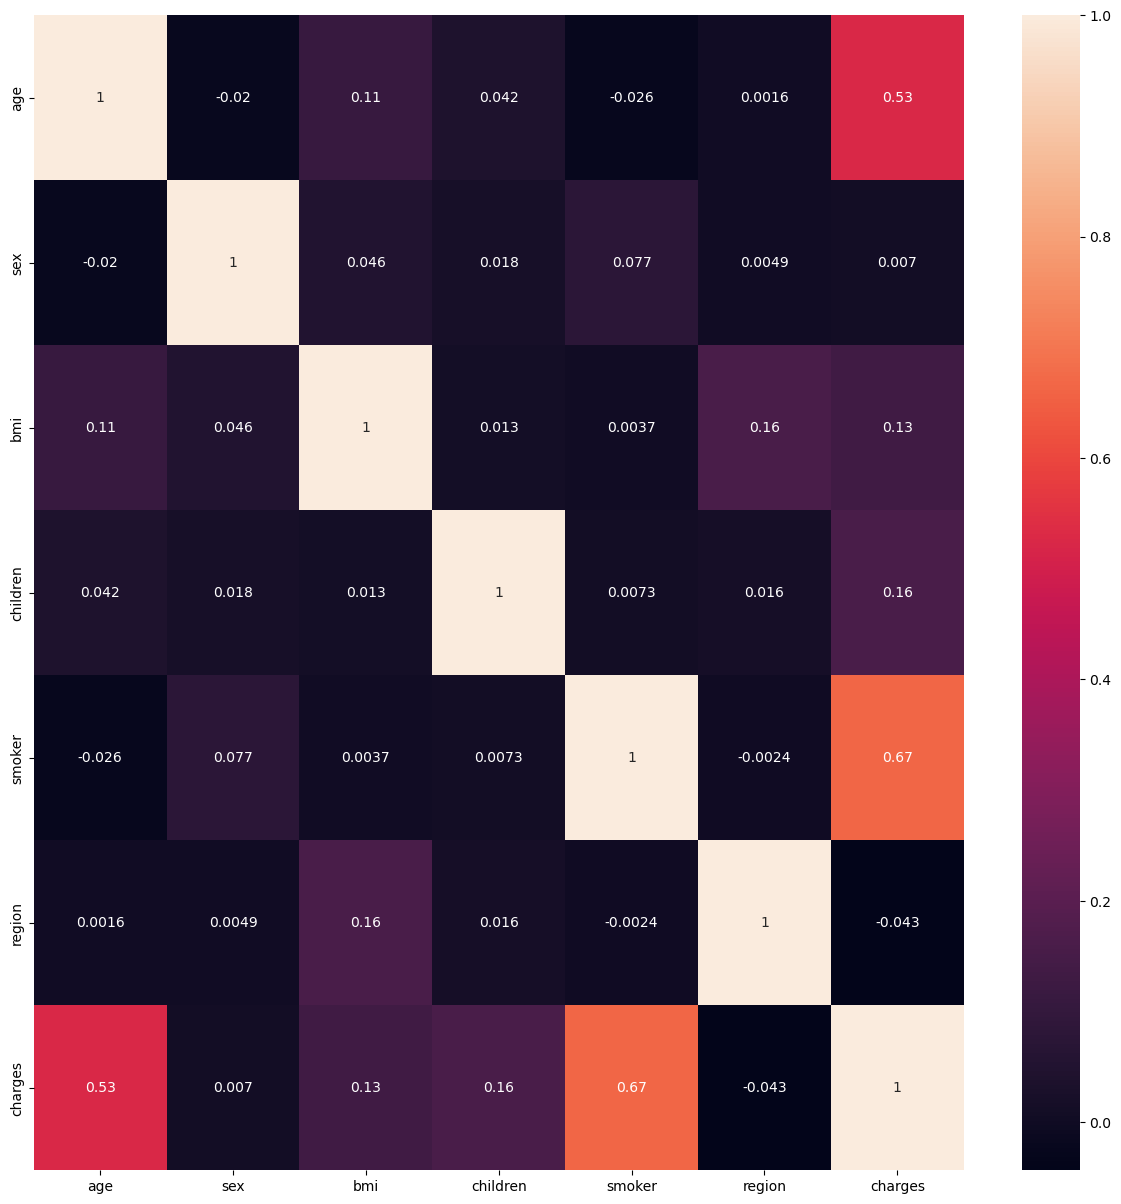

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show

In [41]:
x=df.drop('charges', axis=1)
y=df['charges']

In [42]:
y.value_counts()

9.734236     1
7.658387     1
7.706417     1
9.893389     1
9.477683     1
            ..
8.901923     1
10.170086    1
10.250225    1
7.047861     1
10.279948    1
Name: charges, Length: 1337, dtype: int64

In [45]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
        -0.46712816]])

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [68]:
x = df.drop('charges', axis=1)  # Features
y = df['charges']
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_bins = est.fit_transform(y.values.reshape(-1, 1)).flatten()
x_train, x_test, y_train, y_test = train_test_split(x, y_bins, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8208955223880597
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        31
         1.0       0.86      0.90      0.88        48
         2.0       0.74      0.96      0.84        96
         3.0       0.81      0.35      0.49        49
         4.0       0.95      0.86      0.90        44

    accuracy                           0.82       268
   macro avg       0.85      0.81      0.81       268
weighted avg       0.83      0.82      0.80       268

